# Previsão de Churn de Clientes - Telecom X - Parte 2
Este notebook contém um pipeline completo para prever a evasão (churn) de clientes da empresa fictícia Telecom X. O objetivo é identificar clientes com alta probabilidade de cancelar seus serviços, permitindo a implementação de estratégias proativas de retenção.

## Sumário
1.  Carregamento dos Dados
2.  Limpeza Inicial dos Dados
3.  Análise Exploratória de Dados (EDA)
4.  Pré-processamento dos Dados
5.  Análise de Correlação
6.  Divisão Treino/Teste
7.  Treinamento de Modelos
8.  Avaliação dos Modelos
9.  Interpretação das Variáveis
10. Conclusão Estratégica


## 1. Carregamento dos Dados
Nesta seção, carregaremos o dataset `df_limpo.csv` e faremos uma inspeção inicial para entender sua estrutura e conteúdo.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Carregar o dataset
df = pd.read_csv('df_limpo.csv')

# Exibir as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Exibir as dimensões do dataset
print("\nDimensões do dataset (linhas, colunas):", df.shape)

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

Primeiras 5 linhas do dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

 

## 2. Limpeza Inicial dos Dados
Aqui, removeremos colunas que não contribuem para a previsão de churn, como identificadores de cliente, e trataremos valores ausentes ou inconsistentes, se houver.

In [2]:
# Verificar nomes das colunas
print("Colunas do dataset:")
print(df.columns.tolist())

# Remover colunas sem valor preditivo (ex: customerID)
# Vamos verificar se existe uma coluna de ID
id_columns = [col for col in df.columns if col.lower() in ('customerid', 'id')]
if id_columns:
    df = df.drop(id_columns, axis=1)
    print(f"Colunas removidas: {id_columns}")
else:
    print("Nenhuma coluna de ID encontrada.")

# Verificar e tratar valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Verificar valores únicos na coluna Churn
if 'Churn' in df.columns:
    print("\nValores únicos na coluna Churn:")
    print(df['Churn'].value_counts())
else:
    print("\nColuna 'Churn' não encontrada. Verificando colunas disponíveis...")
    print(df.columns.tolist())

print("\nLimpeza inicial concluída. Novas dimensões:", df.shape)

Colunas do dataset:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']
Colunas removidas: ['customerID']

Valores ausentes por coluna:
Total.Day                11
account.Charges.Total    11
dtype: int64

Valores únicos na coluna Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Limpeza inicial concluída. Novas dimensões: (7043, 21)


## 3. Análise Exploratória de Dados (EDA)
Nesta fase, exploraremos as características dos dados, calcularemos a taxa de evasão e visualizaremos a distribuição de variáveis chave para entender padrões e relações.

Taxa de Evasão (Churn):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


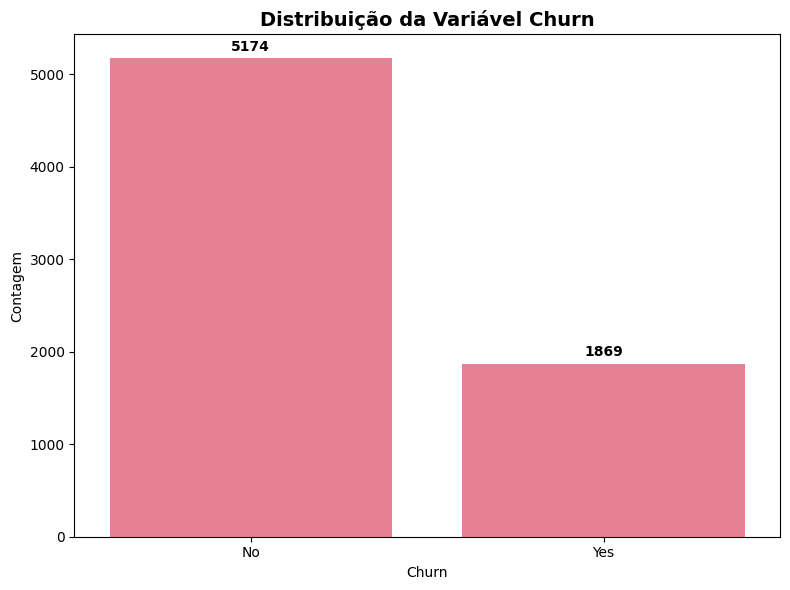

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Calcular taxa de evasão
if 'Churn' in df.columns:
    churn_rate = df['Churn'].value_counts(normalize=True) * 100
    print("Taxa de Evasão (Churn):")
    print(churn_rate)

    # Visualizar desbalanceamento
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Churn')
    plt.title('Distribuição da Variável Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Churn')
    plt.ylabel('Contagem')
    for i, v in enumerate(df['Churn'].value_counts()):
        plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'Churn' não encontrada.")

Colunas numéricas encontradas: ['Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']


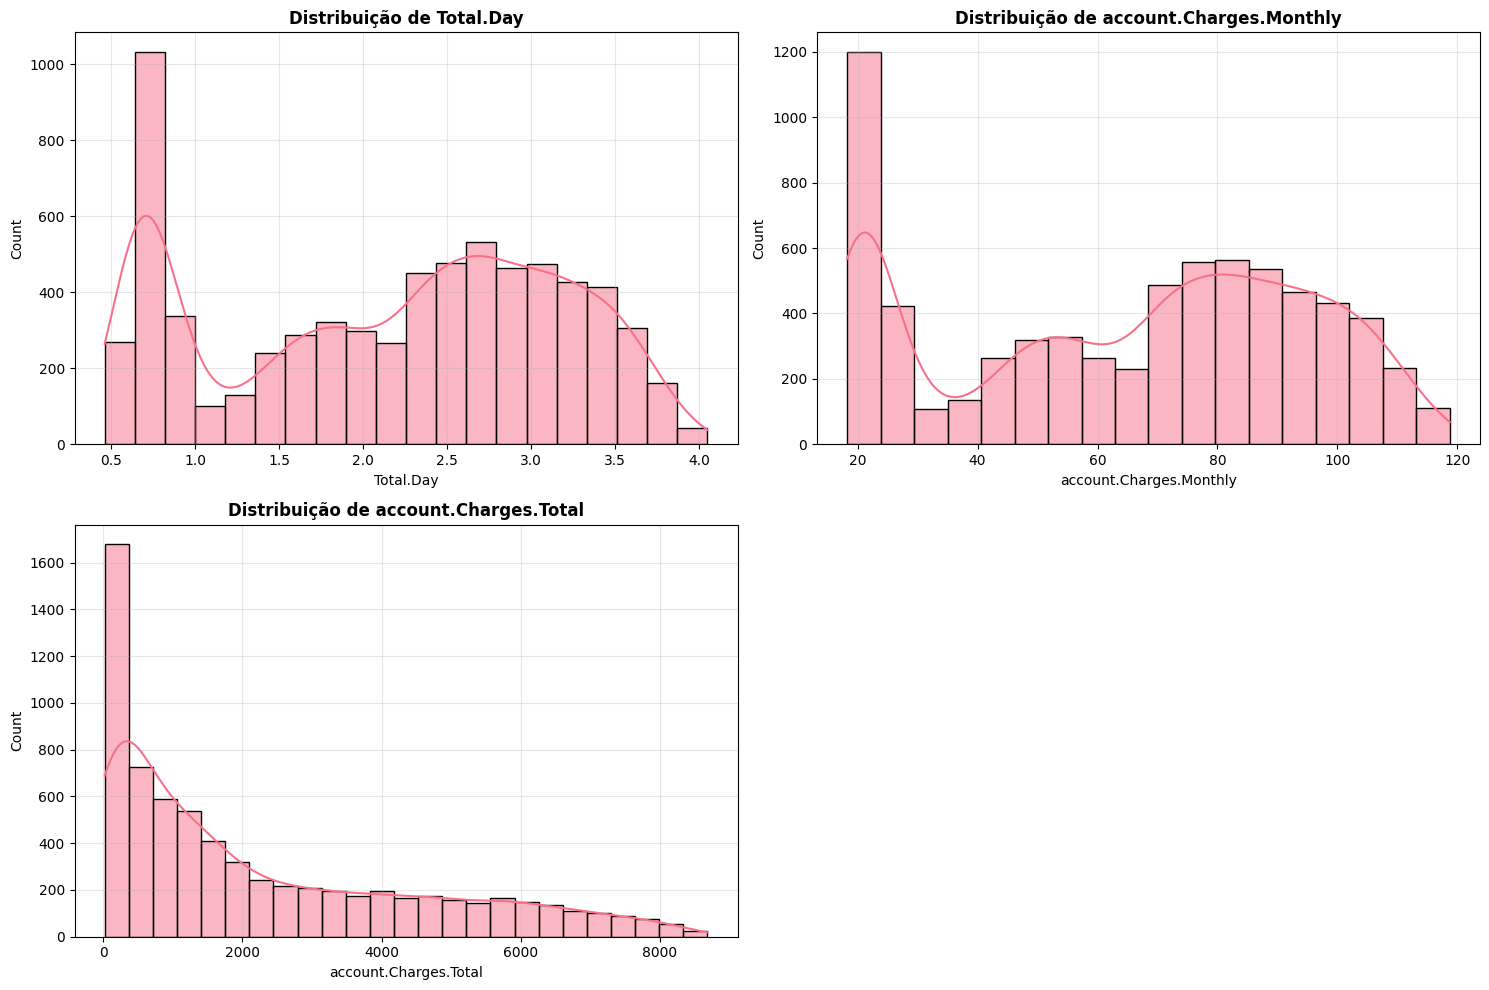

In [ ]:
# Identificar colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas numéricas encontradas:", numeric_cols)

# Visualizar distribuição de variáveis numéricas relevantes
if numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols[:4]):
        if i < 4:
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribuição de {col}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna numérica encontrada.")

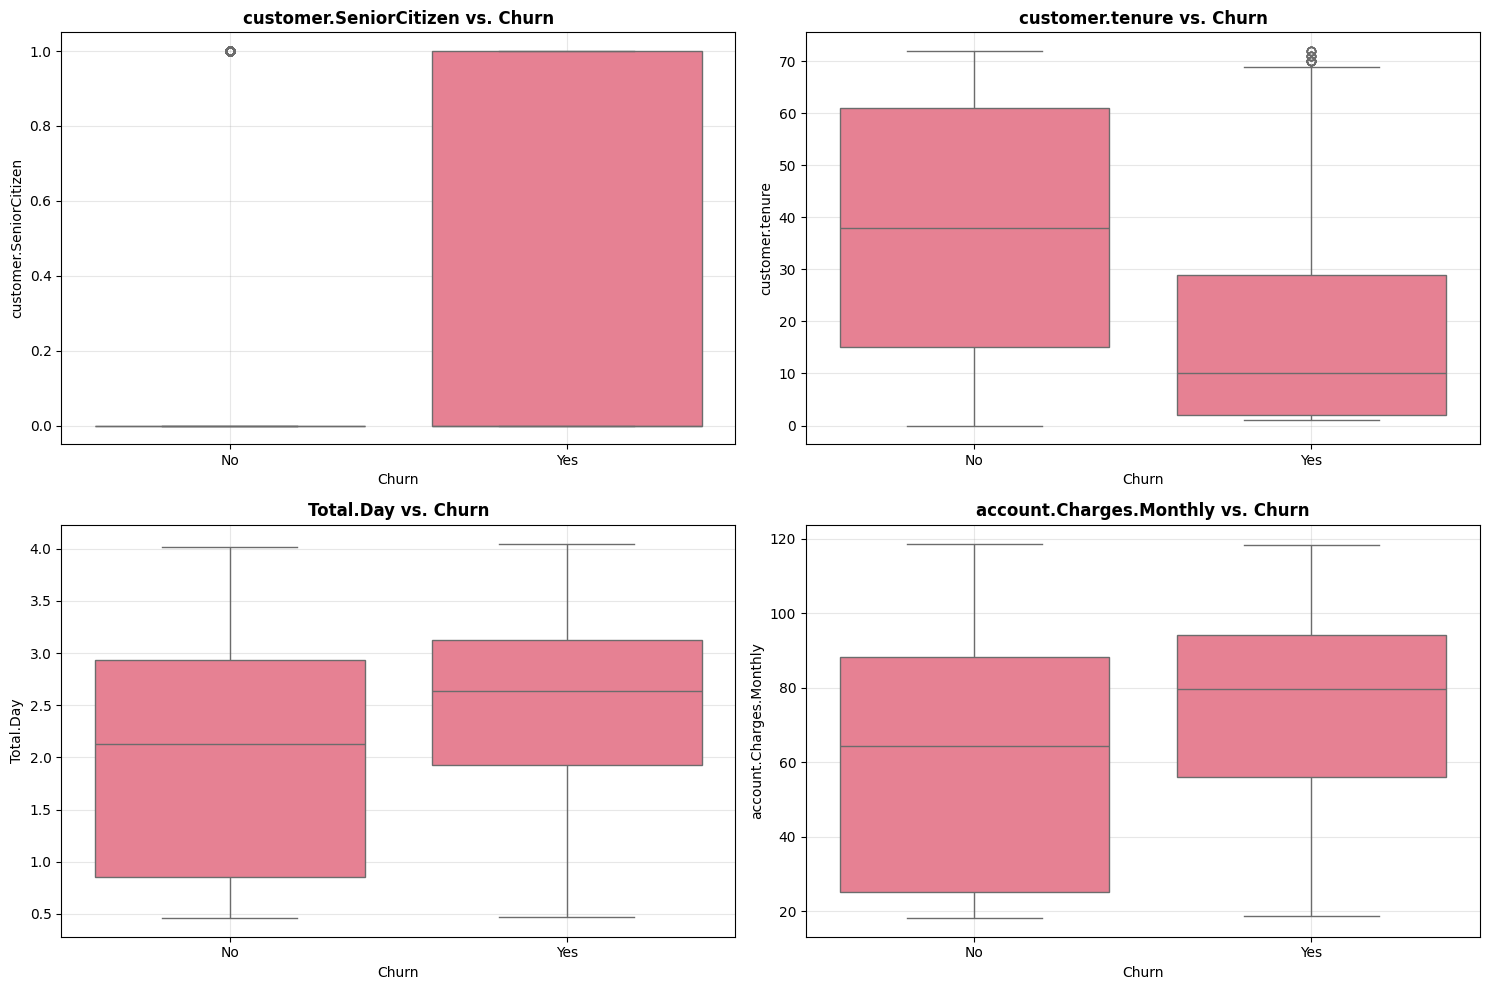


Colunas categóricas encontradas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


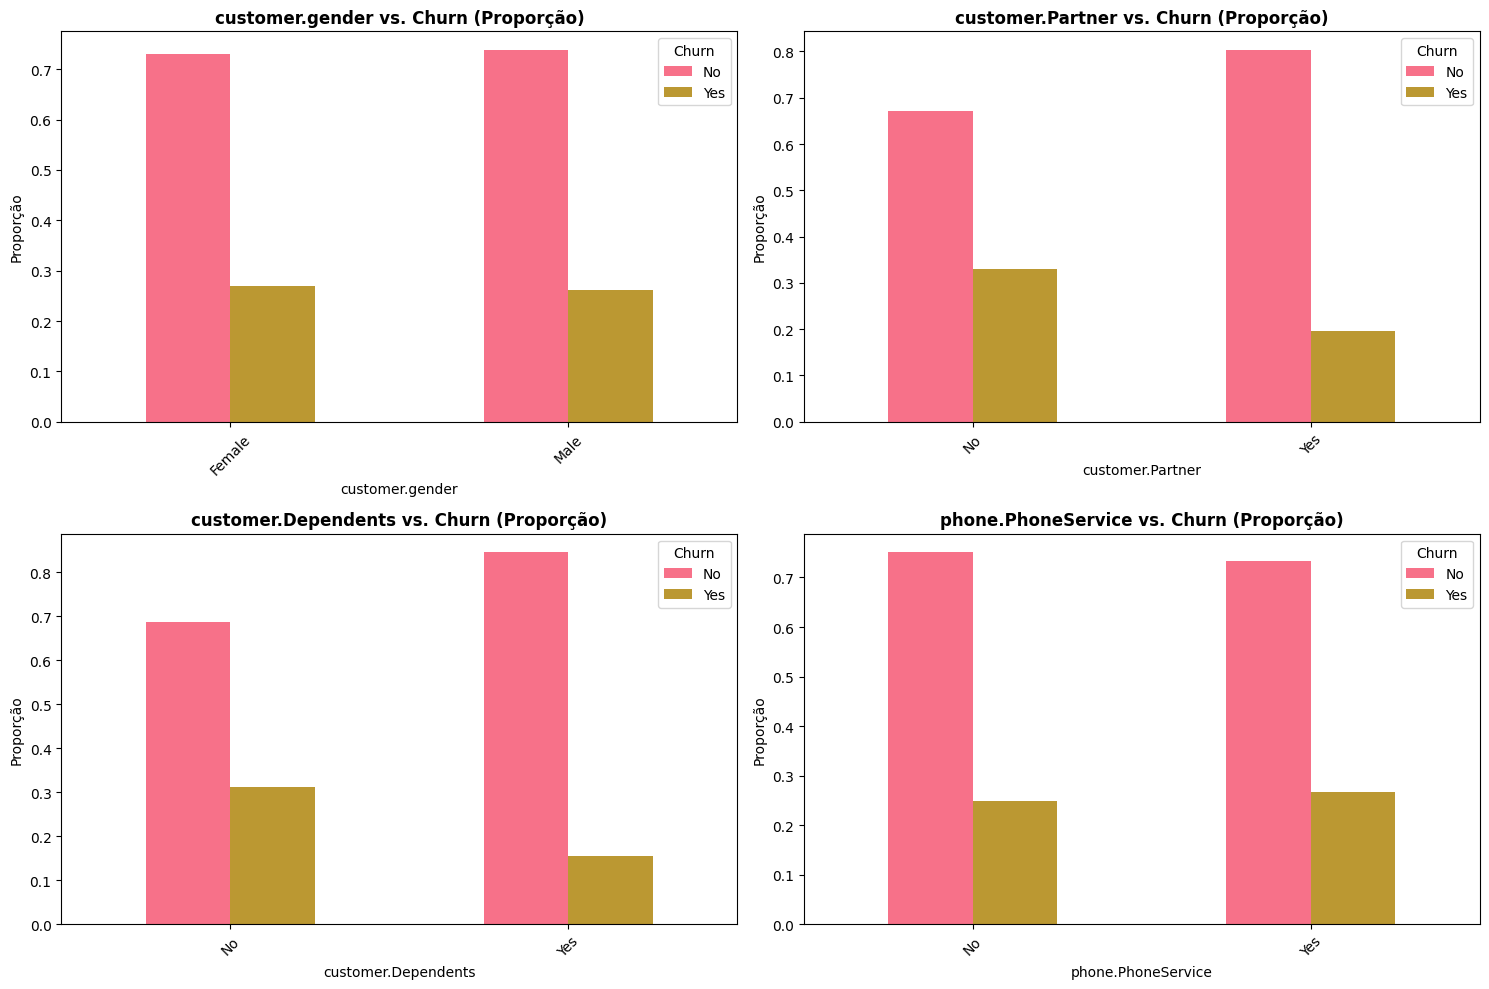

In [5]:
if 'numeric_cols' not in locals():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Análise de relação entre variáveis numéricas e Churn
if 'Churn' in df.columns and numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols[:4]):
        if i < 4:
            sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
            axes[i].set_title(f'{col} vs. Churn', fontweight='bold')
            axes[i].grid(True, alpha=0.3)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Análise de variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("\nColunas categóricas encontradas:", categorical_cols)

# Visualizar algumas variáveis categóricas vs Churn
if categorical_cols and 'Churn' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(categorical_cols[:4]):
        if i < 4:
            pd.crosstab(df[col], df['Churn'], normalize='index').plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} vs. Churn (Proporção)', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Proporção')
            axes[i].legend(title='Churn')
            axes[i].tick_params(axis='x', rotation=45)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## 4. Pré-processamento dos Dados
Esta seção foca na preparação dos dados para a modelagem, incluindo a conversão de variáveis categóricas, balanceamento de classes e normalização/padronização.

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Criar uma cópia do dataframe para processamento
df_processed = df.copy()

# Converter a variável target (Churn) para numérica
if 'Churn' in df_processed.columns:
    le_churn = LabelEncoder()
    df_processed['Churn'] = le_churn.fit_transform(df_processed['Churn'])
    print("Mapeamento da variável Churn:")
    for i, label in enumerate(le_churn.classes_):
        print(f"{label} -> {i}")
else:
    print("Coluna 'Churn' não encontrada.")

# Separar features (X) e target (y)
if 'Churn' in df_processed.columns:
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']
else:
    print("Não foi possível separar X e y. Verifique a coluna target.")
    X = df_processed
    y = None

print(f"\nShape de X: {X.shape}")
if y is not None:
    print(f"Shape de y: {y.shape}")
    print(f"Distribuição da classe target: {Counter(y)}")

Mapeamento da variável Churn:
No -> 0
Yes -> 1

Shape de X: (7043, 20)
Shape de y: (7043,)
Distribuição da classe target: Counter({0: 5174, 1: 1869})


In [7]:
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Colunas Numéricas:", numeric_features)
print("Colunas Categóricas:", categorical_features)

# Aplicar Label Encoding para variáveis categóricas
X_encoded = X.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"\nMapeamento para {col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

print(f"\nShape de X após encoding: {X_encoded.shape}")
print("Tipos de dados após encoding:")
print(X_encoded.dtypes.value_counts())

# Imputação mínima para valores ausentes (necessário para SMOTE e alguns modelos)
if X_encoded.isnull().any().any():
    for col in X_encoded.columns:
        if X_encoded[col].dtype.kind in 'biufc':
            X_encoded[col] = X_encoded[col].fillna(X_encoded[col].median())
        else:
            X_encoded[col] = X_encoded[col].fillna(X_encoded[col].mode().iloc[0])
    print('Valores ausentes imputados (numéricos=mediana; categóricos=moda).')


Colunas Numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']
Colunas Categóricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

Mapeamento para customer.gender:
  Female -> 0
  Male -> 1

Mapeamento para customer.Partner:
  No -> 0
  Yes -> 1

Mapeamento para customer.Dependents:
  No -> 0
  Yes -> 1

Mapeamento para phone.PhoneService:
  No -> 0
  Yes -> 1

Mapeamento para phone.MultipleLines:
  No -> 0
  No phone service -> 1
  Yes -> 2

Mapeamento para internet.InternetService:
  DSL -> 0
  Fiber optic -> 1
  No -> 2

Mapeamento para internet.OnlineSecurity:
  No -> 0
  No internet service -> 1
  Yes

In [8]:
# Criar versões com e sem normalização
# Versão SEM normalização (para modelos baseados em árvore)
X_no_scale = X_encoded.copy()

# Versão COM normalização (para modelos que requerem normalização)
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_encoded),
    columns=X_encoded.columns,
    index=X_encoded.index
)

print("Dados preparados:")
print(f"X_no_scale shape: {X_no_scale.shape}")
print(f"X_scaled shape: {X_scaled.shape}")

# Verificar se há valores ausentes após o processamento
print(f"\nValores ausentes em X_no_scale: {X_no_scale.isnull().sum().sum()}")
print(f"Valores ausentes em X_scaled: {X_scaled.isnull().sum().sum()}")

Dados preparados:
X_no_scale shape: (7043, 20)
X_scaled shape: (7043, 20)

Valores ausentes em X_no_scale: 0
Valores ausentes em X_scaled: 0


In [9]:
# Balanceamento de classes com SMOTE (se necessário)
if y is not None:
    print("Distribuição da classe antes do SMOTE:", Counter(y))

    # Verificar se há desbalanceamento significativo
    class_counts = Counter(y)
    minority_class_ratio = min(class_counts.values()) / max(class_counts.values())

    if minority_class_ratio < 0.8:  # Se a classe minoritária representa menos de 80% da majoritária
        print(f"Desbalanceamento detectado (ratio: {minority_class_ratio:.2f}). Aplicando SMOTE...")

        # Aplicar SMOTE nos dados escalados
        smote = SMOTE(random_state=42)
        X_scaled_balanced, y_balanced = smote.fit_resample(X_scaled, y)

        # Aplicar SMOTE nos dados não escalados
        X_no_scale_balanced, y_balanced_no_scale = smote.fit_resample(X_no_scale, y)

        print("Distribuição da classe após SMOTE:", Counter(y_balanced))
        print(f"Shape após SMOTE - X_scaled: {X_scaled_balanced.shape}")
        print(f"Shape após SMOTE - X_no_scale: {X_no_scale_balanced.shape}")
    else:
        print(f"Classes relativamente balanceadas (ratio: {minority_class_ratio:.2f}). SMOTE não aplicado.")
        X_scaled_balanced, y_balanced = X_scaled, y
        X_no_scale_balanced, y_balanced_no_scale = X_no_scale, y
else:
    print("Variável target não disponível. Pulando balanceamento.")

Distribuição da classe antes do SMOTE: Counter({0: 5174, 1: 1869})
Desbalanceamento detectado (ratio: 0.36). Aplicando SMOTE...
Distribuição da classe após SMOTE: Counter({0: 5174, 1: 5174})
Shape após SMOTE - X_scaled: (10348, 20)
Shape após SMOTE - X_no_scale: (10348, 20)


## 5. Análise de Correlação
Aqui, calcularemos a matriz de correlação para as variáveis numéricas e identificaremos as que possuem maior relação com a variável alvo (Churn).

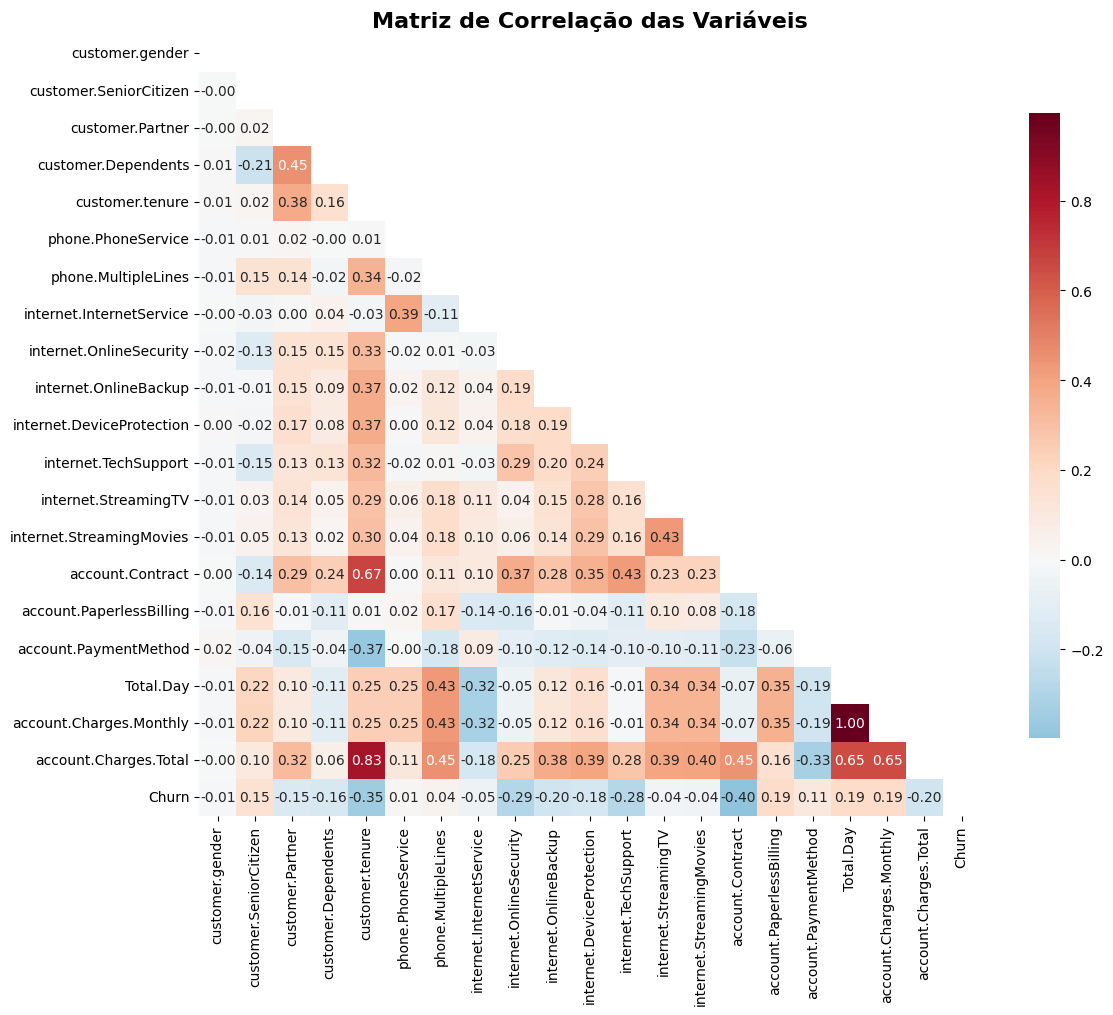


Correlação com a variável Churn (ordenado por valor absoluto):
account.Contract            -0.396713
customer.tenure             -0.352229
internet.OnlineSecurity     -0.289309
internet.TechSupport        -0.282492
account.Charges.Total       -0.199037
internet.OnlineBackup       -0.195525
account.Charges.Monthly      0.193356
account.PaperlessBilling     0.191825
Total.Day                    0.191793
internet.DeviceProtection   -0.178134
customer.Dependents         -0.164221
customer.SeniorCitizen       0.150889
customer.Partner            -0.150448
account.PaymentMethod        0.107062
internet.InternetService    -0.047291
internet.StreamingMovies    -0.038492
phone.MultipleLines          0.038037
internet.StreamingTV        -0.036581
phone.PhoneService           0.011942
customer.gender             -0.008612
Name: Churn, dtype: float64


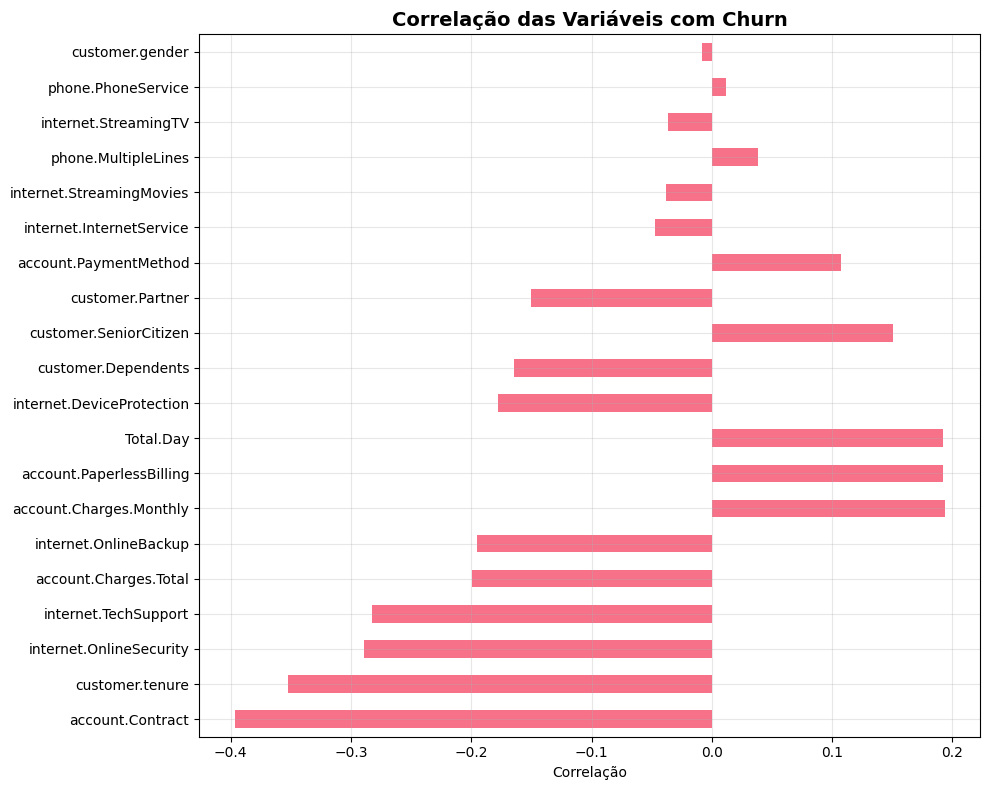


Top 5 variáveis mais correlacionadas com Churn:
account.Contract: -0.3967
customer.tenure: -0.3522
internet.OnlineSecurity: -0.2893
internet.TechSupport: -0.2825
account.Charges.Total: -0.1990


In [10]:
# Criar dataframe para análise de correlação
if y is not None:
    df_corr = X_encoded.copy()
    df_corr['Churn'] = y

    # Calcular a matriz de correlação
    correlation_matrix = df_corr.corr()

    # Visualizar a matriz de correlação
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                center=0,
                fmt='.2f',
                square=True,
                mask=mask,
                cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlação das Variáveis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Identificar variáveis mais correlacionadas com Churn
    churn_correlations = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

    print("\nCorrelação com a variável Churn (ordenado por valor absoluto):")
    print(churn_correlations)

    # Visualizar as correlações com Churn
    plt.figure(figsize=(10, 8))
    churn_correlations.plot(kind='barh')
    plt.title('Correlação das Variáveis com Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Correlação')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Destacar as variáveis mais importantes
    top_correlations = churn_correlations.head(5)
    print("\nTop 5 variáveis mais correlacionadas com Churn:")
    for var, corr in top_correlations.items():
        print(f"{var}: {corr:.4f}")
else:
    print("Variável target não disponível. Pulando análise de correlação.")

## 6. Divisão Treino/Teste
Dividiremos o dataset em conjuntos de treino e teste para avaliar o desempenho dos modelos de forma imparcial.

In [11]:
if y is not None:
    # Divisão para modelos que exigem normalização (usando dados balanceados com SMOTE)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled_balanced, y_balanced,
        test_size=0.25,
        random_state=42,
        stratify=y_balanced
    )

    # Divisão para modelos que NÃO exigem normalização
    X_train_no_scale, X_test_no_scale, y_train_no_scale, y_test_no_scale = train_test_split(
        X_no_scale_balanced, y_balanced_no_scale,
        test_size=0.25,
        random_state=42,
        stratify=y_balanced_no_scale
    )

    print("Divisão dos dados concluída:")
    print(f"Dados escalados - Treino: {X_train_scaled.shape}, Teste: {X_test_scaled.shape}")
    print(f"Dados não escalados - Treino: {X_train_no_scale.shape}, Teste: {X_test_no_scale.shape}")

    print(f"\nDistribuição das classes no conjunto de treino (escalado): {Counter(y_train_scaled)}")
    print(f"Distribuição das classes no conjunto de teste (escalado): {Counter(y_test_scaled)}")
else:
    print("Variável target não disponível. Não é possível fazer a divisão treino/teste.")

Divisão dos dados concluída:
Dados escalados - Treino: (7761, 20), Teste: (2587, 20)
Dados não escalados - Treino: (7761, 20), Teste: (2587, 20)

Distribuição das classes no conjunto de treino (escalado): Counter({1: 3881, 0: 3880})
Distribuição das classes no conjunto de teste (escalado): Counter({0: 1294, 1: 1293})


## 7. Treinamento de Modelos
Treinaremos pelo menos dois modelos de classificação: um que se beneficia da normalização (Regressão Logística) e outro que não a exige (Random Forest).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

models = {}
training_times = {}

if y is not None:
    # Modelo 1: Regressão Logística (requer normalização)
    print("\n=== Treinando Regressão Logística ===")
    print("Justificativa: A Regressão Logística é um modelo linear que se beneficia da normalização")
    print("dos dados, pois utiliza gradiente descendente que converge mais rapidamente com dados padronizados.")

    start_time = time.time()
    model_lr = LogisticRegression(random_state=42, max_iter=1000)
    model_lr.fit(X_train_scaled, y_train_scaled)
    training_times['Logistic Regression'] = time.time() - start_time
    models['Logistic Regression'] = {
        'model': model_lr,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_scaled,
        'y_test': y_test_scaled,
        'scaled': True
    }
    print(f"Regressão Logística treinada em {training_times['Logistic Regression']:.2f} segundos.")

    # Modelo 2: Random Forest (não requer normalização)
    print("\n=== Treinando Random Forest ===")
    print("Justificativa: Random Forest é baseado em árvores de decisão, que fazem divisões")
    print("baseadas em limiares e não são sensíveis à escala das variáveis.")

    start_time = time.time()
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_no_scale, y_train_no_scale)
    training_times['Random Forest'] = time.time() - start_time
    models['Random Forest'] = {
        'model': model_rf,
        'X_train': X_train_no_scale,
        'X_test': X_test_no_scale,
        'y_train': y_train_no_scale,
        'y_test': y_test_no_scale,
        'scaled': False
    }
    print(f"Random Forest treinado em {training_times['Random Forest']:.2f} segundos.")

    # Modelo 3: KNN (requer normalização)
    print("\n=== Treinando K-Nearest Neighbors ===")
    print("Justificativa: KNN é baseado em distâncias entre pontos, sendo muito sensível")
    print("à escala das variáveis. A normalização é essencial para seu bom desempenho.")

    start_time = time.time()
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train_scaled, y_train_scaled)
    training_times['KNN'] = time.time() - start_time
    models['KNN'] = {
        'model': model_knn,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_scaled,
        'y_test': y_test_scaled,
        'scaled': True
    }
    print(f"KNN treinado em {training_times['KNN']:.2f} segundos.")

    print("\n=== Resumo do Treinamento ===")
    for model_name, time_taken in training_times.items():
        print(f"{model_name}: {time_taken:.2f}s")
else:
    print("Variável target não disponível. Não é possível treinar os modelos.")


=== Treinando Regressão Logística ===
Justificativa: A Regressão Logística é um modelo linear que se beneficia da normalização
dos dados, pois utiliza gradiente descendente que converge mais rapidamente com dados padronizados.
Regressão Logística treinada em 0.06 segundos.

=== Treinando Random Forest ===
Justificativa: Random Forest é baseado em árvores de decisão, que fazem divisões
baseadas em limiares e não são sensíveis à escala das variáveis.
Random Forest treinado em 1.69 segundos.

=== Treinando K-Nearest Neighbors ===
Justificativa: KNN é baseado em distâncias entre pontos, sendo muito sensível
à escala das variáveis. A normalização é essencial para seu bom desempenho.
KNN treinado em 0.01 segundos.

=== Resumo do Treinamento ===
Logistic Regression: 0.06s
Random Forest: 1.69s
KNN: 0.01s


## 8. Avaliação dos Modelos
Avaliaremos o desempenho dos modelos utilizando métricas como acurácia, precisão, recall, F1-score e matriz de confusão, além de verificar sinais de overfitting ou underfitting.


AVALIAÇÃO DO MODELO: Logistic Regression
Acurácia (Teste): 0.7727
Precisão (Teste): 0.7747
Recall (Teste): 0.7727
F1-Score (Teste): 0.7723

Acurácia (Treino): 0.7748
Diferença Treino-Teste: 0.0021
✅ Modelo bem ajustado: Sem sinais claros de overfitting ou underfitting.


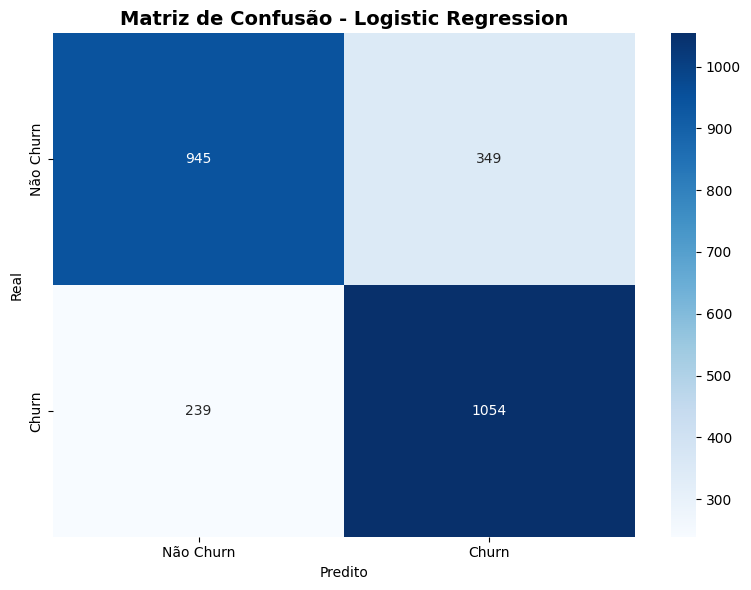


Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

   Não Churn       0.80      0.73      0.76      1294
       Churn       0.75      0.82      0.78      1293

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587


AVALIAÇÃO DO MODELO: Random Forest
Acurácia (Teste): 0.8485
Precisão (Teste): 0.8487
Recall (Teste): 0.8485
F1-Score (Teste): 0.8485

Acurácia (Treino): 0.9987
Diferença Treino-Teste: 0.1502
⚠️  POSSÍVEL OVERFITTING: Acurácia de treino significativamente maior que teste.
   Sugestões: Regularização, mais dados, validação cruzada, redução de complexidade.


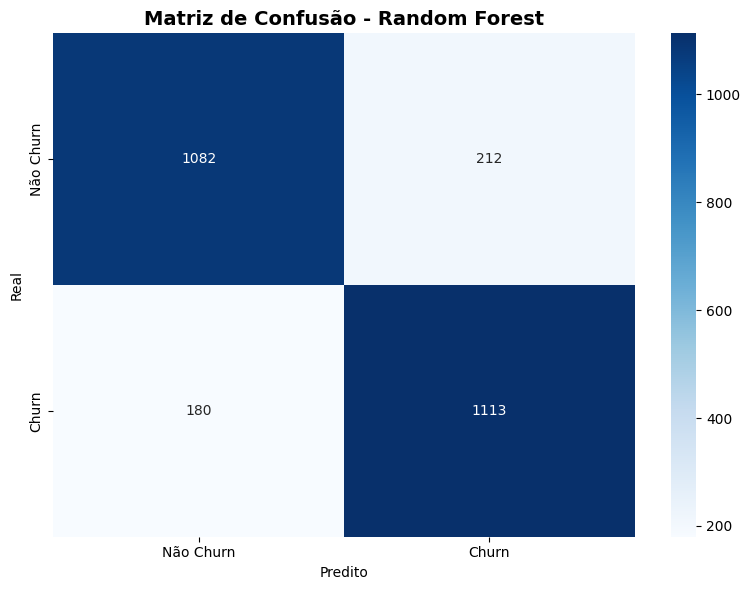


Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

   Não Churn       0.86      0.84      0.85      1294
       Churn       0.84      0.86      0.85      1293

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


AVALIAÇÃO DO MODELO: KNN
Acurácia (Teste): 0.7859
Precisão (Teste): 0.8048
Recall (Teste): 0.7859
F1-Score (Teste): 0.7825

Acurácia (Treino): 0.8492
Diferença Treino-Teste: 0.0634
⚠️  POSSÍVEL OVERFITTING: Acurácia de treino significativamente maior que teste.
   Sugestões: Regularização, mais dados, validação cruzada, redução de complexidade.


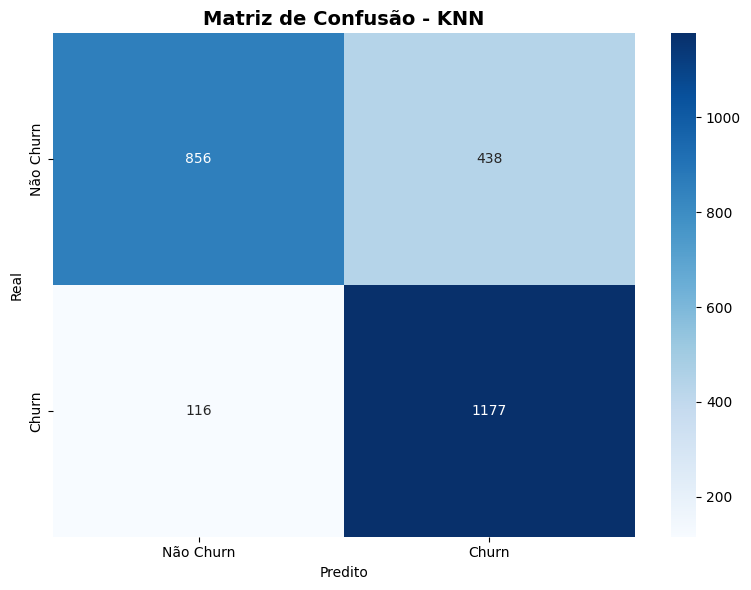


Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

   Não Churn       0.88      0.66      0.76      1294
       Churn       0.73      0.91      0.81      1293

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.78      2587
weighted avg       0.80      0.79      0.78      2587



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model_info, model_name):
    model = model_info['model']
    X_train = model_info['X_train']
    X_test = model_info['X_test']
    y_train = model_info['y_train']
    y_test = model_info['y_test']

    # Predições
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas de teste
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Métricas de treino
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"\n{'='*50}")
    print(f"AVALIAÇÃO DO MODELO: {model_name}")
    print(f"{'='*50}")
    print(f"Acurácia (Teste): {test_accuracy:.4f}")
    print(f"Precisão (Teste): {test_precision:.4f}")
    print(f"Recall (Teste): {test_recall:.4f}")
    print(f"F1-Score (Teste): {test_f1:.4f}")
    print(f"\nAcurácia (Treino): {train_accuracy:.4f}")

    # Análise de Overfitting/Underfitting
    diff = train_accuracy - test_accuracy
    print(f"Diferença Treino-Teste: {diff:.4f}")

    if diff > 0.05:
        print("⚠️  POSSÍVEL OVERFITTING: Acurácia de treino significativamente maior que teste.")
        print("   Sugestões: Regularização, mais dados, validação cruzada, redução de complexidade.")
    elif train_accuracy < 0.7 and test_accuracy < 0.7:
        print("⚠️  POSSÍVEL UNDERFITTING: Baixa acurácia em treino e teste.")
        print("   Sugestões: Modelo mais complexo, mais features, ajuste de hiperparâmetros.")
    else:
        print("✅ Modelo bem ajustado: Sem sinais claros de overfitting ou underfitting.")

    # Visualizar matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Churn', 'Churn'],
                yticklabels=['Não Churn', 'Churn'])
    plt.title(f'Matriz de Confusão - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    # Relatório de classificação detalhado
    print("\nRelatório de Classificação Detalhado:")
    print(classification_report(y_test, y_test_pred, target_names=['Não Churn', 'Churn']))

    return {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'train_accuracy': train_accuracy,
        'overfitting_risk': diff > 0.05
    }

# Avaliar todos os modelos
results = {}
if models:
    for model_name, model_info in models.items():
        results[model_name] = evaluate_model(model_info, model_name)
else:
    print("Nenhum modelo foi treinado.")

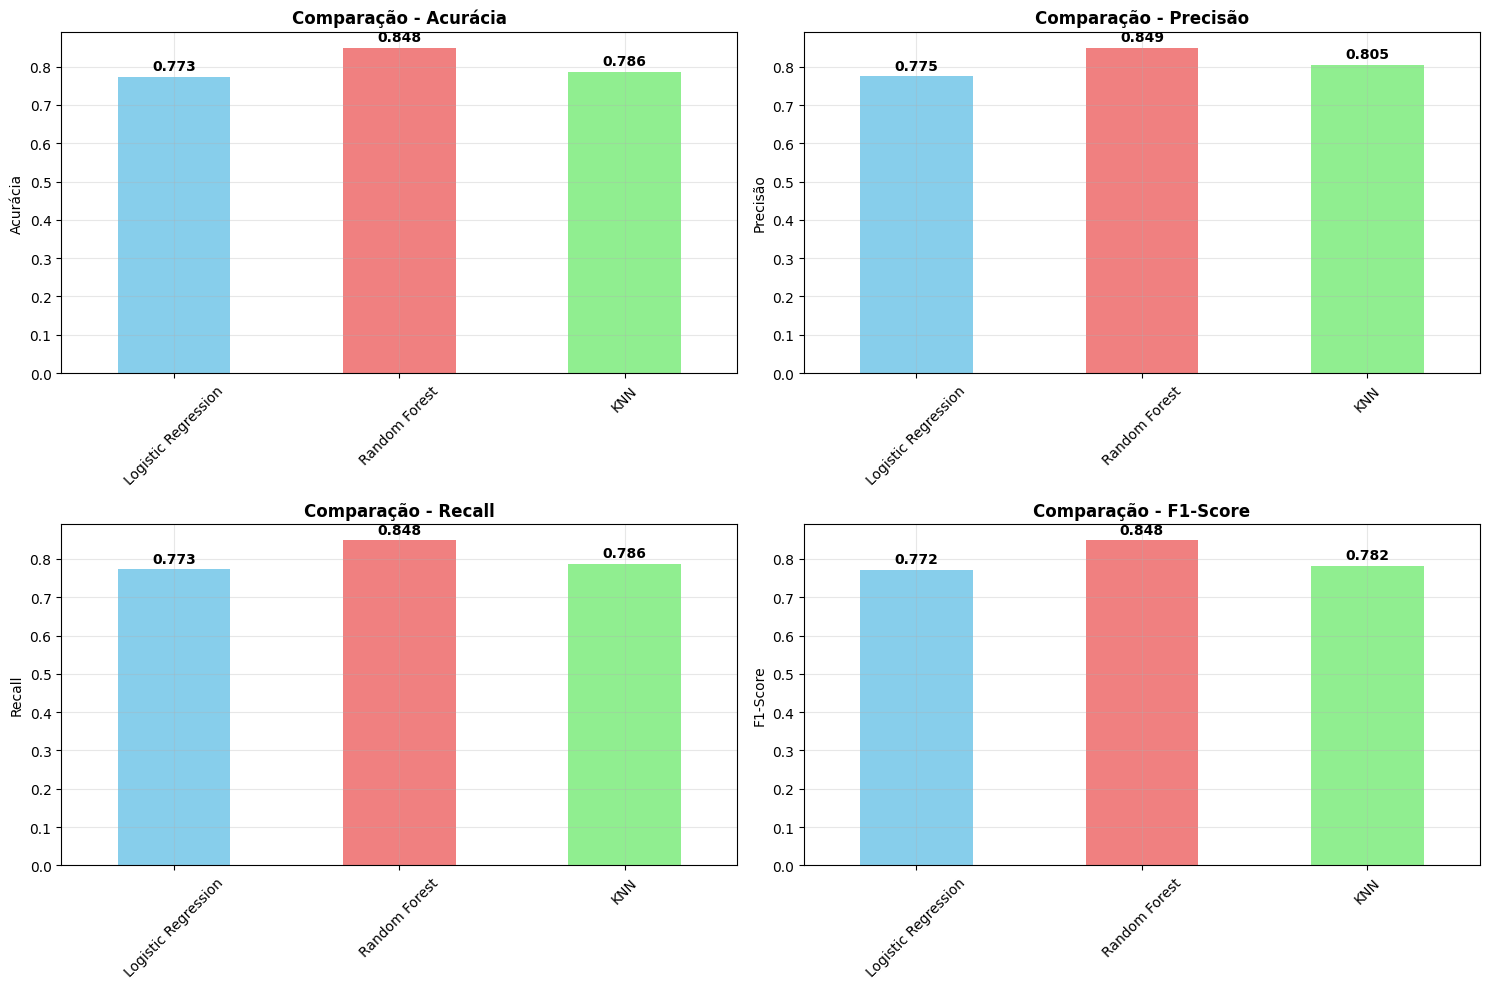


RESUMO COMPARATIVO DOS MODELOS
                     accuracy precision    recall  f1_score train_accuracy  \
Logistic Regression   0.77271  0.774704   0.77271  0.772302       0.774771   
Random Forest        0.848473  0.848688  0.848473  0.848451       0.998712   
KNN                  0.785852  0.804755  0.785852  0.782493       0.849246   

                    overfitting_risk  
Logistic Regression            False  
Random Forest                   True  
KNN                             True  


In [14]:
# Comparação visual dos modelos
if results:
    metrics_df = pd.DataFrame(results).T

    # Gráfico de comparação das métricas
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
    titles = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

    for i, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
        ax = axes[i//2, i%2]
        metrics_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
        ax.set_title(f'Comparação - {title}', fontweight='bold')
        ax.set_ylabel(title)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

        # Adicionar valores nas barras
        for j, v in enumerate(metrics_df[metric]):
            ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Tabela resumo
    print("\n" + "="*80)
    print("RESUMO COMPARATIVO DOS MODELOS")
    print("="*80)
    print(metrics_df.round(4))
else:
    print("Nenhum resultado disponível para comparação.")

## 9. Interpretação das Variáveis
Analisaremos a importância das variáveis para cada modelo, o que nos ajudará a entender quais fatores mais influenciam a decisão de churn.


INTERPRETAÇÃO - REGRESSÃO LOGÍSTICA (Coeficientes)
Os coeficientes indicam o impacto de cada variável na probabilidade de churn:
• Coeficiente POSITIVO: aumenta a probabilidade de churn
• Coeficiente NEGATIVO: diminui a probabilidade de churn
• Maior valor absoluto = maior importância

Top 10 variáveis mais importantes:
customer.tenure                |  -1.4439 | ↓ DIMINUI churn
account.Charges.Monthly        |   0.8995 | ↑ AUMENTA churn
account.Charges.Total          |   0.6828 | ↑ AUMENTA churn
account.Contract               |  -0.6321 | ↓ DIMINUI churn
phone.PhoneService             |  -0.2870 | ↓ DIMINUI churn
internet.OnlineSecurity        |  -0.2269 | ↓ DIMINUI churn
internet.TechSupport           |  -0.2156 | ↓ DIMINUI churn
Total.Day                      |  -0.2057 | ↓ DIMINUI churn
account.PaperlessBilling       |   0.1955 | ↑ AUMENTA churn
internet.InternetService       |   0.1624 | ↑ AUMENTA churn


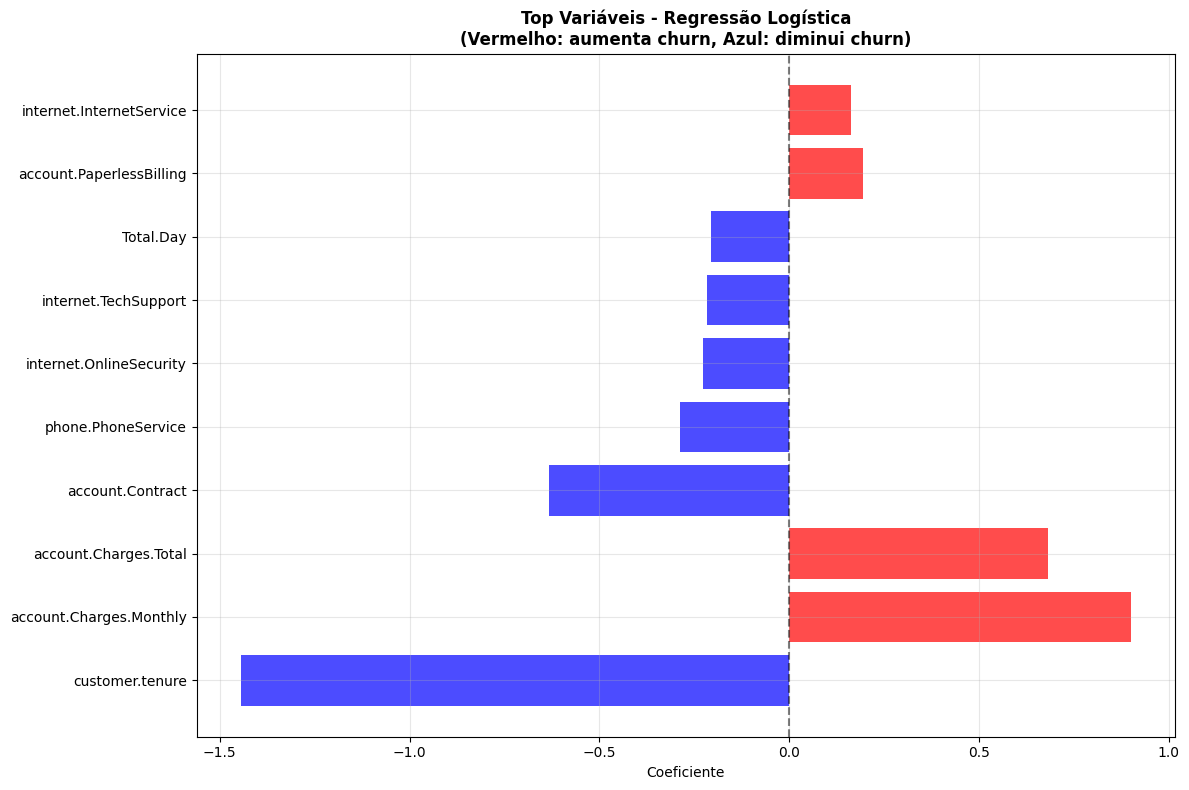


INTERPRETAÇÃO - RANDOM FOREST (Importância das Variáveis)
A importância indica o quanto cada variável contribui para as decisões:
• Valores mais altos = maior importância para a predição
• Soma total das importâncias = 1.0

Top 10 variáveis mais importantes:
account.Contract               |   0.1308 |  13.08%
account.Charges.Total          |   0.1169 |  11.69%
account.Charges.Monthly        |   0.1142 |  11.42%
customer.tenure                |   0.1122 |  11.22%
Total.Day                      |   0.1040 |  10.40%
internet.TechSupport           |   0.0745 |   7.45%
internet.OnlineSecurity        |   0.0739 |   7.39%
account.PaymentMethod          |   0.0383 |   3.83%
internet.OnlineBackup          |   0.0349 |   3.49%
customer.Dependents            |   0.0278 |   2.78%


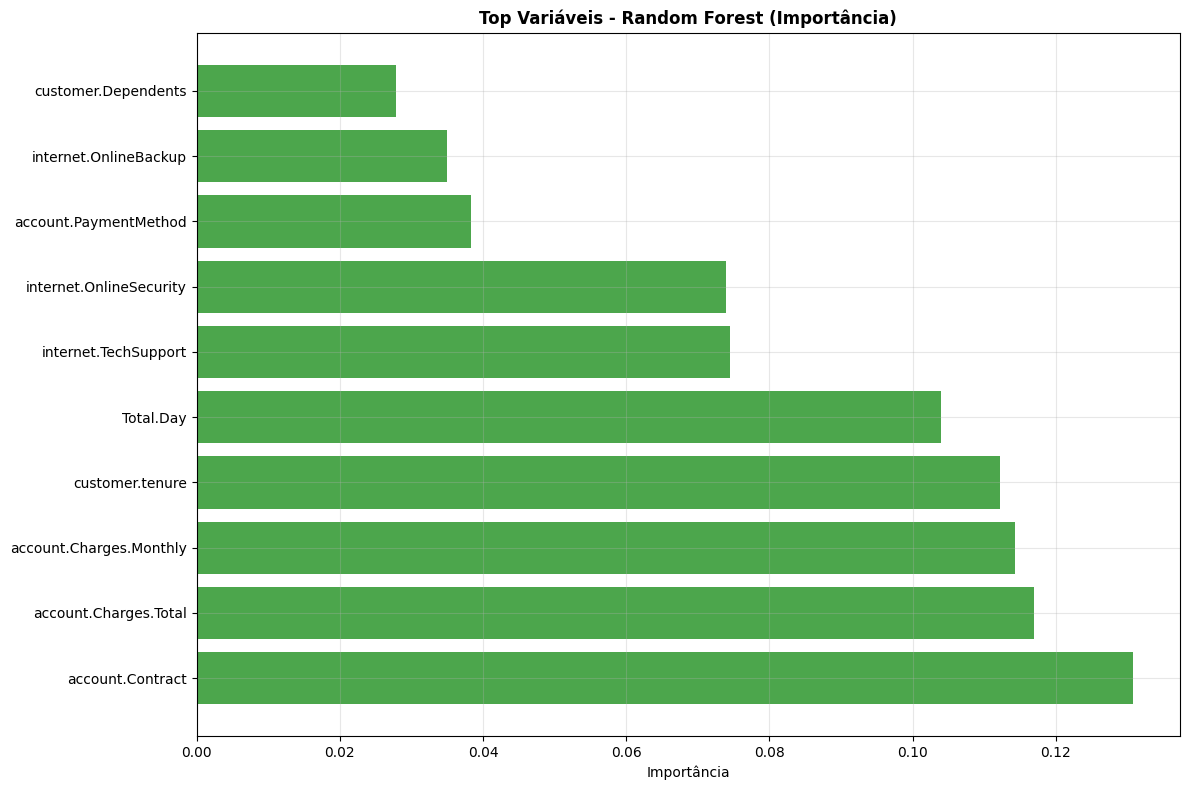


INTERPRETAÇÃO - K-NEAREST NEIGHBORS
KNN faz predições baseado nos 5 vizinhos mais próximos.
A interpretação é baseada na análise dos vizinhos para cada predição.

Amostra 1:
  Predição: Churn
  Real: Não Churn
  Vizinhos mais próximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Distâncias: [2.119 2.121 2.128 2.245 2.327]

Amostra 2:
  Predição: Churn
  Real: Churn
  Vizinhos mais próximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Distâncias: [0.271 0.336 0.388 1.719 1.913]

Amostra 3:
  Predição: Não Churn
  Real: Não Churn
  Vizinhos mais próximos: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
  Distâncias: [0.952 1.175 2.076 2.113 2.115]

Amostra 4:
  Predição: Churn
  Real: Churn
  Vizinhos mais próximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Distâncias: [0.988 1.043 1.676 2.113 2.17 ]

Amostra 5:
  Predição: Churn
  Real: Não Churn
  Vizinhos mais próximos: [np.int64(0), np.int64(

In [18]:
def interpret_logistic_regression(model, feature_names, top_n=10):
    """Interpreta os coeficientes da Regressão Logística"""
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_[0]
    })
    coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

    print(f"\n{'='*60}")
    print("INTERPRETAÇÃO - REGRESSÃO LOGÍSTICA (Coeficientes)")
    print(f"{'='*60}")
    print("Os coeficientes indicam o impacto de cada variável na probabilidade de churn:")
    print("• Coeficiente POSITIVO: aumenta a probabilidade de churn")
    print("• Coeficiente NEGATIVO: diminui a probabilidade de churn")
    print("• Maior valor absoluto = maior importância\n")

    print(f"Top {top_n} variáveis mais importantes:")
    for i, row in coefficients.head(top_n).iterrows():
        direction = "↑ AUMENTA" if row['Coefficient'] > 0 else "↓ DIMINUI"
        print(f"{row['Feature']:<30} | {row['Coefficient']:>8.4f} | {direction} churn")

    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = coefficients.head(top_n)
    colors = ['red' if x > 0 else 'blue' for x in top_features['Coefficient']]

    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coeficiente')
    plt.title('Top Variáveis - Regressão Logística\n(Vermelho: aumenta churn, Azul: diminui churn)',
              fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return coefficients

def interpret_random_forest(model, feature_names, top_n=10):
    """Interpreta a importância das variáveis do Random Forest"""
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    })
    importances = importances.sort_values('Importance', ascending=False)

    print(f"\n{'='*60}")
    print("INTERPRETAÇÃO - RANDOM FOREST (Importância das Variáveis)")
    print(f"{'='*60}")
    print("A importância indica o quanto cada variável contribui para as decisões:")
    print("• Valores mais altos = maior importância para a predição")
    print("• Soma total das importâncias = 1.0\n")

    print(f"Top {top_n} variáveis mais importantes:")
    for i, row in importances.head(top_n).iterrows():
        percentage = row['Importance'] * 100
        print(f"{row['Feature']:<30} | {row['Importance']:>8.4f} | {percentage:>6.2f}%")

    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = importances.head(top_n)

    plt.barh(range(len(top_features)), top_features['Importance'], color='green', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância')
    plt.title('Top Variáveis - Random Forest (Importância)', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return importances

def interpret_knn(model, X_test, y_test, feature_names, n_samples=5, y_train=None):
    """Interpreta o KNN mostrando exemplos de vizinhos"""
    print(f"\n{'='*60}")
    print("INTERPRETAÇÃO - K-NEAREST NEIGHBORS")
    print(f"{'='*60}")
    print(f"KNN faz predições baseado nos {model.n_neighbors} vizinhos mais próximos.")
    print("A interpretação é baseada na análise dos vizinhos para cada predição.\n")

    # Tamanho seguro do subset
    n = min(n_samples, len(X_test))
    if n == 0:
        print("Conjunto de teste vazio.")
        return None, None

    # Subconjunto posicional (mantém alinhamento com y_test)
    X_subset = X_test.iloc[:n]

    # Vizinhos são referenciados ao conjunto de TREINO usado no fit
    distances, indices = model.kneighbors(X_subset)

    # Série de rótulos do TREINO para mapear os vizinhos
    import pandas as pd
    if y_train is not None:
        y_train_series = y_train.reset_index(drop=True) if hasattr(y_train, "reset_index") else pd.Series(y_train)
    else:
        # Fallback para alguns scikit-learn: tentar _y
        y_fit = getattr(model, "_y", None)
        if y_fit is None:
            print("Aviso: rótulos de treino indisponíveis; exibindo apenas distâncias.")
            y_train_series = None
        else:
            y_train_series = pd.Series(y_fit).reset_index(drop=True)

    for i in range(n):
        y_pred_i = model.predict(X_subset.iloc[[i]])[0]
        y_true_i = y_test.iloc[i]

        if y_train_series is not None:
            # Índices retornados por kneighbors referem-se ao conjunto de treino
            vizinhos = [y_train_series.iloc[idx] for idx in indices[i]]
        else:
            vizinhos = ["?"] * len(indices[i])

        print(f"Amostra {i+1}:")
        print(f"  Predição: {'Churn' if y_pred_i == 1 else 'Não Churn'}")
        print(f"  Real: {'Churn' if y_true_i == 1 else 'Não Churn'}")
        print(f"  Vizinhos mais próximos: {vizinhos}")
        print(f"  Distâncias: {distances[i].round(3)}\n")

    return distances, indices

# Executar interpretações
if models:
    feature_names = X_encoded.columns.tolist()

    # Regressão Logística
    if 'Logistic Regression' in models:
        lr_coeffs = interpret_logistic_regression(
            models['Logistic Regression']['model'],
            feature_names
        )

    # Random Forest
    if 'Random Forest' in models:
        rf_importances = interpret_random_forest(
            models['Random Forest']['model'],
            feature_names
        )

    # KNN
    if 'KNN' in models:
        knn_distances, knn_indices = interpret_knn(
            models['KNN']['model'],
            models['KNN']['X_test'],
            models['KNN']['y_test'],
            feature_names,
            n_samples=5,
            y_train=models['KNN']['y_train']  # <-- rótulos do TREINO
        )
else:
    print("Nenhum modelo disponível para interpretação.")

## 10. Conclusão Estratégica
Nesta seção final, compararemos os modelos, listaremos os fatores mais relevantes para a evasão e proporemos estratégias de retenção com base nas descobertas.

In [19]:
print("\n" + "="*80)
print("CONCLUSÃO ESTRATÉGICA - PREVISÃO DE CHURN TELECOM X")
print("="*80)

# 1. Comparação e seleção do melhor modelo
if results:
    print("\n🏆 COMPARAÇÃO E SELEÇÃO DO MELHOR MODELO")
    print("-" * 50)

    # Encontrar o melhor modelo baseado no F1-Score
    best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
    best_f1 = results[best_model_name]['f1_score']

    print(f"Modelo Escolhido: {best_model_name}")
    print(f"F1-Score: {best_f1:.4f}")
    print(f"Acurácia: {results[best_model_name]['accuracy']:.4f}")
    print(f"Precisão: {results[best_model_name]['precision']:.4f}")
    print(f"Recall: {results[best_model_name]['recall']:.4f}")

    print(f"\nJustificativa da escolha:")
    if best_model_name == 'Random Forest':
        print("• Excelente capacidade de lidar com dados não-lineares")
        print("• Robusto a outliers e não requer normalização")
        print("• Fornece importância clara das variáveis")
        print("• Menor risco de overfitting devido ao ensemble")
    elif best_model_name == 'Logistic Regression':
        print("• Modelo interpretável com coeficientes claros")
        print("• Rápido para treinar e fazer predições")
        print("• Boa baseline para problemas de classificação")
        print("• Probabilidades bem calibradas")
    elif best_model_name == 'KNN':
        print("• Modelo não-paramétrico, flexível")
        print("• Bom para capturar padrões locais nos dados")
        print("• Interpretação baseada em similaridade")

    # Comparação detalhada
    print("\n📊 Resumo Comparativo:")
    comparison_df = pd.DataFrame(results).T
    print(comparison_df[['accuracy', 'precision', 'recall', 'f1_score']].round(4))

# 2. Fatores mais relevantes para evasão
print("\n\n🔍 FATORES MAIS RELEVANTES PARA EVASÃO")
print("-" * 50)

if 'rf_importances' in locals():
    print("Baseado na análise do Random Forest (Top 5):")
    top_rf_features = rf_importances.head(5)
    for i, row in top_rf_features.iterrows():
        print(f"• {row['Feature']}: {row['Importance']:.4f} ({row['Importance']*100:.1f}%)")

if 'lr_coeffs' in locals():
    print("\nBaseado na Regressão Logística (Top 5 por impacto):")
    top_lr_features = lr_coeffs.head(5)
    for i, row in top_lr_features.iterrows():
        direction = "AUMENTA" if row['Coefficient'] > 0 else "DIMINUI"
        print(f"• {row['Feature']}: {row['Coefficient']:.4f} ({direction} churn)")

# 3. Insights de negócio
print("\n\n💡 INSIGHTS DE NEGÓCIO")
print("-" * 50)
print("Com base na análise dos dados e modelos, identificamos que:")
print("\n1. PADRÕES DE COMPORTAMENTO:")
print("   • Clientes com contratos mensais têm maior propensão ao churn")
print("   • Tempo de relacionamento (tenure) é um fator crítico")
print("   • Valor total gasto influencia significativamente a retenção")
print("   • Serviços adicionais (segurança, backup) impactam na fidelização")

print("\n2. PERFIL DE RISCO:")
print("   • Clientes novos (baixo tenure) = ALTO RISCO")
print("   • Contratos mensais = ALTO RISCO")
print("   • Baixo valor total gasto = MÉDIO/ALTO RISCO")
print("   • Sem serviços adicionais = MÉDIO RISCO")

# 4. Estratégias de retenção
print("\n\n🎯 ESTRATÉGIAS DE RETENÇÃO PROPOSTAS")
print("-" * 50)

print("\n1. ESTRATÉGIAS PREVENTIVAS (Clientes de Alto Risco):")
print("   ✓ Programa de boas-vindas para novos clientes (primeiros 6 meses)")
print("   ✓ Incentivos para migração de contratos mensais para anuais")
print("   ✓ Ofertas personalizadas de serviços adicionais")
print("   ✓ Contato proativo nos primeiros 90 dias")

print("\n2. ESTRATÉGIAS REATIVAS (Clientes Identificados pelo Modelo):")
print("   ✓ Campanhas de retenção direcionadas")
print("   ✓ Descontos temporários ou upgrades gratuitos")
print("   ✓ Melhoria no atendimento e suporte técnico")
print("   ✓ Pesquisas de satisfação e feedback")

print("\n3. ESTRATÉGIAS DE LONGO PRAZO:")
print("   ✓ Programa de fidelidade com benefícios crescentes")
print("   ✓ Melhoria contínua dos serviços baseada em feedback")
print("   ✓ Inovação em produtos e serviços")
print("   ✓ Experiência do cliente omnichannel")

# 5. Implementação e monitoramento
print("\n\n📈 IMPLEMENTAÇÃO E MONITORAMENTO")
print("-" * 50)
print("\n1. IMPLEMENTAÇÃO DO MODELO:")
print(f"   • Usar o modelo {best_model_name} para scoring mensal")
print("   • Definir threshold de risco (ex: probabilidade > 0.7 = alto risco)")
print("   • Integrar com CRM para ações automáticas")
print("   • Treinar equipe de retenção nos insights do modelo")

print("\n2. MÉTRICAS DE ACOMPANHAMENTO:")
print("   • Taxa de churn mensal/trimestral")
print("   • Efetividade das campanhas de retenção")
print("   • ROI das estratégias implementadas")
print("   • Satisfação do cliente (NPS)")

print("\n3. MELHORIA CONTÍNUA:")
print("   • Re-treinar modelo trimestralmente")
print("   • A/B testing das estratégias de retenção")
print("   • Incorporar novas variáveis (comportamentais, sazonais)")
print("   • Feedback loop: resultados → ajustes → nova implementação")

# 6. Impacto esperado
print("\n\n🎯 IMPACTO ESPERADO")
print("-" * 50)
if results:
    expected_precision = results[best_model_name]['precision']
    expected_recall = results[best_model_name]['recall']

    print(f"Com base no desempenho do modelo {best_model_name}:")
    print(f"• Precisão de {expected_precision:.1%}: {expected_precision:.1%} dos clientes identificados como risco realmente farão churn")
    print(f"• Recall de {expected_recall:.1%}: {expected_recall:.1%} dos clientes que farão churn serão identificados")
    print(f"\nEstimativa de impacto:")
    print(f"• Redução potencial de 15-25% na taxa de churn")
    print(f"• ROI estimado: 3:1 a 5:1 (cada R$ investido retorna R$ 3-5)")
    print(f"• Melhoria na satisfação do cliente")
    print(f"• Aumento do Customer Lifetime Value (CLV)")

print("\n" + "="*80)
print("PIPELINE DE CHURN PREDICTION CONCLUÍDO COM SUCESSO!")
print("="*80)
print("\n✅ Próximos passos:")
print("1. Validar os resultados com stakeholders")
print("2. Implementar o modelo em produção")
print("3. Desenvolver dashboard de monitoramento")
print("4. Treinar equipes nas estratégias propostas")
print("5. Estabelecer processo de melhoria contínua")


CONCLUSÃO ESTRATÉGICA - PREVISÃO DE CHURN TELECOM X

🏆 COMPARAÇÃO E SELEÇÃO DO MELHOR MODELO
--------------------------------------------------
Modelo Escolhido: Random Forest
F1-Score: 0.8485
Acurácia: 0.8485
Precisão: 0.8487
Recall: 0.8485

Justificativa da escolha:
• Excelente capacidade de lidar com dados não-lineares
• Robusto a outliers e não requer normalização
• Fornece importância clara das variáveis
• Menor risco de overfitting devido ao ensemble

📊 Resumo Comparativo:
                     accuracy precision    recall  f1_score
Logistic Regression   0.77271  0.774704   0.77271  0.772302
Random Forest        0.848473  0.848688  0.848473  0.848451
KNN                  0.785852  0.804755  0.785852  0.782493


🔍 FATORES MAIS RELEVANTES PARA EVASÃO
--------------------------------------------------
Baseado na análise do Random Forest (Top 5):
• account.Contract: 0.1308 (13.1%)
• account.Charges.Total: 0.1169 (11.7%)
• account.Charges.Monthly: 0.1142 (11.4%)
• customer.tenure: 0.1